In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats.stats import kendalltau
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D, Conv1DTranspose
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import LSTM, Masking
from tensorflow.keras.layers import MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import activations
sns.set()

In [2]:
#permutation feature importance values
gbc_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/gbc_pfi.csv')
ada_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/ada_pfi.csv')
rfc_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/rfc_pfi.csv')
nb_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/nb_pfi.csv')
nnmlp_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/nnmlp_pfi.csv')
svc_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/svc_pfi.csv')
lstm_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/lstm_pfi.csv')
cnn_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/cnn_pfi.csv')

gbc_pfi = gbc_pfi.weight.values
ada_pfi = ada_pfi.weight.values
rfc_pfi = rfc_pfi.weight.values
nb_pfi = nb_pfi.weight.values
nnmlp_pfi = nnmlp_pfi.weight.values
svc_pfi = svc_pfi.weight.values
lstm_pfi = lstm_pfi.weight.values
cnn_pfi = cnn_pfi.weight.values

gbc_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/gbc_pfi_corr.csv')
ada_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/ada_pfi_corr.csv')
rfc_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/rfc_pfi_corr.csv')
nb_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/nb_pfi_corr.csv')
nnmlp_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/nnmlp_pfi_corr.csv')
svc_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/svc_pfi_corr.csv')
lstm_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/lstm_pfi_corr.csv')
cnn_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/cnn_pfi_corr.csv')

gbc_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/gbc_pfi_mis.csv')
ada_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/ada_pfi_mis.csv')
rfc_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/rfc_pfi_mis.csv')
nb_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/nb_pfi_mis.csv')
nnmlp_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/nnmlp_pfi_mis.csv')
svc_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/svc_pfi_mis.csv')
lstm_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/lstm_pfi_mis.csv')
cnn_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/cnn_pfi_mis.csv')

gbc_pfi_corr = gbc_pfi_corr.weight.values
ada_pfi_corr = ada_pfi_corr.weight.values
rfc_pfi_corr = rfc_pfi_corr.weight.values
nb_pfi_corr = nb_pfi_corr.weight.values
nnmlp_pfi_corr = nnmlp_pfi_corr.weight.values
svc_pfi_corr = svc_pfi_corr.weight.values
lstm_pfi_corr = lstm_pfi_corr.weight.values
cnn_pfi_corr = cnn_pfi_corr.weight.values

gbc_pfi_mis = gbc_pfi_mis.weight.values
ada_pfi_mis = ada_pfi_mis.weight.values
rfc_pfi_mis = rfc_pfi_mis.weight.values
nb_pfi_mis = nb_pfi_mis.weight.values
nnmlp_pfi_mis = nnmlp_pfi_mis.weight.values
svc_pfi_mis = svc_pfi_mis.weight.values
lstm_pfi_mis = lstm_pfi_mis.weight.values
cnn_pfi_mis = cnn_pfi_mis.weight.values

In [3]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *

train_values = np.empty(shape=[0, 222])
test_values = np.empty(shape=[0, 222])

train_sampled_all = glob.glob('./drive/MyDrive/compsci/train_sampled_all_220.csv')
# test_sampled_all = glob.glob('./drive/MyDrive/compsci/test_sampled_all_centered_220.csv')
test_unsampled_all = glob.glob('./drive/MyDrive/compsci/test_unsampled_all_220.csv')

for j in train_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)
    
# for j in test_all:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     test_values = np.append(test_values, csvrows, axis=0)

for j in test_unsampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

Loading  ./drive/MyDrive/compsci/train_sampled_all_220.csv
Loading  ./drive/MyDrive/compsci/test_unsampled_all_220.csv
(31912, 222)
(37863, 222)


In [4]:
X_train = train_values[:,:-2]
X_test = test_values[:,:-2]
y_train = train_values[:,-2]
y_test = test_values[:,-2]
y_train_gc = (y_train - y_train.min())/(y_train.max()-y_train.min())*(9-1)
y_test_gc = (y_test - y_test.min())/(y_test.max()-y_test.min())*(9-1)
X_train1 = X_train.reshape(X_train.shape + (1,1))
X_test1 = X_test.reshape(X_test.shape + (1,1))
y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)

In [5]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

verbose, epoch, batch_size = 1, 5, 256
activationFunction='relu'

def getlstmModel():
    
    lstmmodel = Sequential()
    lstmmodel.add(LSTM(128, return_sequences=True, input_shape=(X_train1.shape[1],1)))
    lstmmodel.add(LSTM(9, return_sequences=True))
    lstmmodel.add(MaxPooling1D(pool_size=2))
    lstmmodel.add(Flatten())
    lstmmodel.add(Dense(512, activation=tf.nn.relu))    
    lstmmodel.add(Dense(128, activation=tf.nn.relu))    
    lstmmodel.add(Dense(32, activation=tf.nn.relu))
    lstmmodel.add(Dense(9, activation='softmax'))
    lstmmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    lstmmodel.summary()
    return lstmmodel

lstmmodel = getlstmModel()

lstmmodelhistory= lstmmodel.fit(X_train1[:,:,:,0], y_train1, epochs=epoch, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 220, 128)          66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 220, 9)            4968      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 110, 9)            0         
_________________________________________________________________
flatten (Flatten)            (None, 990)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               507392    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


25529/25529 [==============================] - 63s 2ms/sample - loss: 0.6380 - accuracy: 0.7880 - val_loss: 0.2404 - val_accuracy: 0.9303
Epoch 2/5
25529/25529 [==============================] - 32s 1ms/sample - loss: 0.2057 - accuracy: 0.9361 - val_loss: 0.1963 - val_accuracy: 0.9384
Epoch 3/5
25529/25529 [==============================] - 32s 1ms/sample - loss: 0.1241 - accuracy: 0.9614 - val_loss: 0.1324 - val_accuracy: 0.9604
Epoch 4/5
25529/25529 [==============================] - 32s 1ms/sample - loss: 0.0964 - accuracy: 0.9682 - val_loss: 0.1163 - val_accuracy: 0.9638
Epoch 5/5
25529/25529 [==============================] - 32s 1ms/sample - loss: 0.0729 - accuracy: 0.9765 - val_loss: 0.1099 - val_accuracy: 0.9646


In [6]:
get_last_conv1 = keras.backend.function([lstmmodel.layers[0].input, keras.backend.learning_phase()], [lstmmodel.layers[1].output])
last_conv1_lstm = get_last_conv1([X_test1[:,:,:,0]])[0]

get_softmax1_lstm = keras.backend.function([lstmmodel.layers[0].input, keras.backend.learning_phase()], [lstmmodel.layers[-1].output])
softmax1_lstm = get_softmax1_lstm(([X_test1[:,:,:,0]]))[0]
softmax_weight1_lstm = lstmmodel.get_weights()[-1]
softmax_weight_lstm = np.reshape(softmax_weight1_lstm,(9,1))

In [7]:
from itertools import islice
def means_of_slices(iterable, slice_size):
    iterator = iter(iterable)
    while True:
        slice = list(islice(iterator, slice_size))
        if slice:
            yield np.sum(slice)/len(slice)
        else:
            return
a = last_conv1_lstm
new_last_lstm = []
for i in range(len(last_conv1_lstm)):
  means = list(means_of_slices(a[i], 20))
  new_last_lstm.append(means)
new_last_lstm = np.array(new_last_lstm)
print(new_last_lstm.shape)

final_last_lstm = []
for i in new_last_lstm:
  final_last_lstm.append(np.repeat(i,20))
final_last_lstm = np.array(final_last_lstm)
print(final_last_lstm.shape)

(37863, 11)
(37863, 220)


In [8]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

verbose, epoch, batch_size = 1, 5, 64
activationFunction='relu'

def getModel():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=16,padding='same', activation='relu',input_shape=(X_train1.shape[1],1)))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=32, kernel_size=16,padding='same', activation='relu'))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=9, kernel_size=16,padding='same', activation='relu'))
    cnnmodel.add(MaxPooling1D(pool_size=2,padding='same'))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(512, activation='relu'))
    cnnmodel.add(Dense(128, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(9, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()
modelhistory= cnnmodel.fit(X_train1[:,:,:,0], y_train1, epochs=epoch, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 220, 128)          2176      
_________________________________________________________________
batch_normalization (BatchNo (None, 220, 128)          512       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 220, 32)           65568     
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 32)           128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 220, 9)            4617      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 110, 9)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 990)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


25529/25529 [==============================] - 6s 220us/sample - loss: 0.3419 - accuracy: 0.8911 - val_loss: 0.4050 - val_accuracy: 0.8676
Epoch 2/5
25529/25529 [==============================] - 3s 126us/sample - loss: 0.1385 - accuracy: 0.9537 - val_loss: 0.1300 - val_accuracy: 0.9561
Epoch 3/5
25529/25529 [==============================] - 3s 126us/sample - loss: 0.0869 - accuracy: 0.9711 - val_loss: 0.0955 - val_accuracy: 0.9713
Epoch 4/5
25529/25529 [==============================] - 3s 126us/sample - loss: 0.0670 - accuracy: 0.9765 - val_loss: 0.0819 - val_accuracy: 0.9737
Epoch 5/5
25529/25529 [==============================] - 3s 127us/sample - loss: 0.0574 - accuracy: 0.9809 - val_loss: 0.0869 - val_accuracy: 0.9721


In [9]:
get_last_conv1 = keras.backend.function([cnnmodel.layers[0].input, keras.backend.learning_phase()], [cnnmodel.layers[4].output])
last_conv1_cnn = get_last_conv1([X_test1[:,:,:,0]])[0]

get_softmax1_cnn = keras.backend.function([cnnmodel.layers[0].input, keras.backend.learning_phase()], [cnnmodel.layers[-1].output])
softmax1_cnn = get_softmax1_cnn(([X_test1[:,:,:,0]]))[0]
softmax_weight1_cnn = cnnmodel.get_weights()[-1]
softmax_weight_cnn = np.reshape(softmax_weight1_cnn,(9,1))

In [112]:
from itertools import islice
def means_of_slices(iterable, slice_size):
    iterator = iter(iterable)
    while True:
        slice = list(islice(iterator, slice_size))
        if slice:
            yield np.sum(slice)/len(slice)
        else:
            return
a = last_conv1_cnn
new_last_conv1 = []

for i in range(len(last_conv1_cnn)):
  means = list(means_of_slices(a[i], 20))
  new_last_conv1.append(means)
new_last_conv1 = np.array(new_last_conv1)
print(new_last_conv1.shape)

final_last_conv1 = []
for i in new_last_conv1:
  final_last_conv1.append(np.repeat(i,20))
final_last_conv1 = np.array(final_last_conv1)
print(final_last_conv1.shape)

(37863, 11)
(37863, 220)


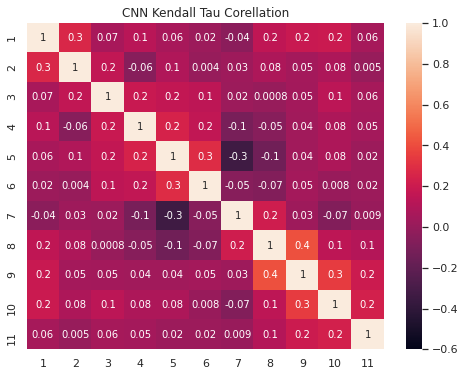

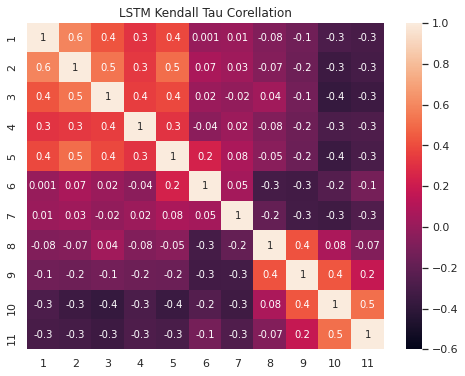

In [113]:
df_cnn = pd.DataFrame(new_last_conv1)
corr_cnn = df_cnn.corr(method='kendall')
slices_nums = [1,2,3,4,5,6,7,8,9,10,11]
rcParams['figure.figsize'] = 8,6
sns.heatmap(corr_cnn,annot=True,xticklabels=slices_nums,yticklabels=slices_nums,vmin=-0.6,vmax=1,fmt='0.1g')
plt.title('CNN Kendall Tau Corellation')
plt.show()

df_lstm = pd.DataFrame(new_last_lstm)
corr_lstm = df_lstm.corr(method='kendall')
slices_nums = [1,2,3,4,5,6,7,8,9,10,11]
rcParams['figure.figsize'] = 8,6
sns.heatmap(corr_lstm,annot=True,xticklabels=slices_nums,yticklabels=slices_nums,vmin=-0.6,vmax=1,fmt='0.1g')
plt.title('LSTM Kendall Tau Corellation')
plt.show()

In [114]:
from itertools import islice
def means_of_slices(iterable, slice_size):
    iterator = iter(iterable)
    while True:
        slice = list(islice(iterator, slice_size))
        if slice:
            yield np.sum(slice)/len(slice)
        else:
            return

a = X_test[:,:]
print(a.shape)
b = []

for i in range(10):
  means = list(means_of_slices(a[i], 20))
  b.append(means)
b = np.array(b)
print(b.shape)

c = []
for i in b:
  c.append(np.repeat(i,20))
c = np.array(c)
print(c.shape)

(37863, 220)
(10, 11)
(10, 220)


0     0.106882
1     0.080623
2     0.029119
3     0.279480
4    -0.178500
5    -0.305273
6    -0.278404
7     0.093226
8     0.249384
9     0.109744
10    0.101351
dtype: float64


Text(0.5, 1.0, 'Kendall Tau Correlation Between CNN and LSTM Segments')

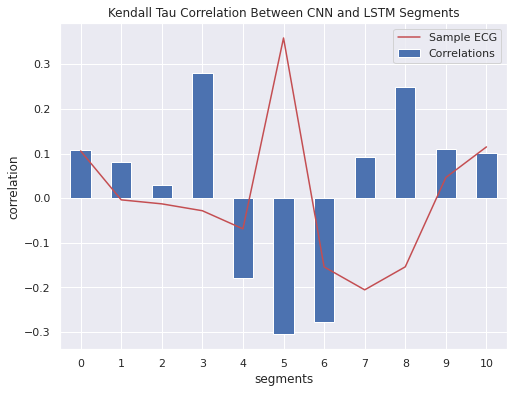

In [130]:
# df_cnn_std = (df_cnn-df_cnn.mean())/df_cnn.std()
# df_lstm_std = (df_lstm-df_lstm.mean())/df_lstm.std()
rcParams['figure.figsize'] = 8,6

corrwith = df_cnn.corrwith(df_lstm, method='kendall')
print(corrwith)

corrwith.plot(kind='bar',rot=0, label = 'Correlations')
plt.plot(b[0]/6, color='r',label = 'Sample ECG')

plt.legend()

plt.xlabel('segments')
plt.ylabel('correlation')
plt.title('Kendall Tau Correlation Between CNN and LSTM Segments')

In [13]:
models = [gbc_pfi,ada_pfi,rfc_pfi,nb_pfi,nnmlp_pfi,svc_pfi,cnn_pfi,lstm_pfi]
models = pd.DataFrame(models)
models = models.transpose()
models.columns = ['GBC','ADA','RFC','NB','NNMLP','SVC','CNN','LSTM']
models

,GBC,ADA,RFC,NB,NNMLP,SVC,CNN,LSTM
0,0.034641,0.003312,0.016655,0.005055,0.124026,0.127803,0.032755,0.068679
1,0.040794,0.006703,0.053968,0.007437,0.125156,0.133001,0.053245,0.014378
2,0.059541,0.005826,0.072593,-0.028941,0.144796,0.159998,0.079117,0.031646
3,0.062103,0.006059,0.049431,-0.025978,0.137226,0.141140,0.104408,0.025164
4,0.066656,0.046251,0.039659,0.053282,0.119299,0.072989,0.131749,0.049954
5,0.115406,0.076101,0.141315,-0.011494,0.199894,0.154906,0.060677,0.124866
6,0.147305,0.037419,0.086734,0.017753,0.248026,0.173827,0.146053,0.191358
7,0.143586,0.038550,0.175232,0.044878,0.238449,0.180826,0.199995,0.194010
8,0.032306,0.049985,0.033833,-0.047476,0.065911,0.074511,0.108306,0.057312
9,0.025349,0.027906,0.035803,-0.056477,0.130750,0.127132,0.035459,0.080538


In [14]:
models_corr = [gbc_pfi_corr,ada_pfi_corr,rfc_pfi_corr,nb_pfi_corr,nnmlp_pfi_corr,svc_pfi_corr,cnn_pfi_corr,lstm_pfi_corr]
models_corr = pd.DataFrame(models_corr)
models_corr = models_corr.transpose()
models_corr.columns = ['GBC','ADA','RFC','NB','NNMLP','SVC','CNN','LSTM']
models_corr

,GBC,ADA,RFC,NB,NNMLP,SVC,CNN,LSTM
0,0.063889,0.023401,0.034738,0.076995,0.161992,0.169829,0.032507,0.067092
1,0.061475,0.028502,0.076412,0.101750,0.162933,0.171479,0.055758,0.013799
2,0.091362,0.022711,0.112472,0.055265,0.188359,0.206618,0.081934,0.033069
3,0.099663,0.169065,0.075400,0.106764,0.181434,0.186764,0.108076,0.023872
4,0.113919,0.258008,0.077381,0.232320,0.158530,0.104656,0.134969,0.050382
5,0.161676,0.339998,0.193759,0.187719,0.246880,0.197620,0.061902,0.125372
6,0.199523,0.164624,0.119846,0.151513,0.301565,0.215652,0.151799,0.193887
7,0.208227,0.257585,0.230301,0.324488,0.292066,0.225606,0.206082,0.202354
8,0.064700,0.197348,0.069415,0.138668,0.110106,0.116385,0.111826,0.057477
9,0.052004,0.249769,0.065722,0.069371,0.180582,0.167882,0.037211,0.084411


In [15]:
models_mis = [gbc_pfi_mis,ada_pfi_mis,rfc_pfi_mis,nb_pfi_mis,nnmlp_pfi_mis,svc_pfi_mis,cnn_pfi_mis,lstm_pfi_mis]
models_mis = pd.DataFrame(models_mis)
models_mis = models_mis.transpose()
models_mis.columns = ['GBC','ADA','RFC','NB','NNMLP','SVC','CNN','LSTM']
models_mis

,GBC,ADA,RFC,NB,NNMLP,SVC,CNN,LSTM
0,-0.130393,-0.019315,-0.091677,-0.031060,-0.216069,-0.237860,0.007350,0.085885
1,-0.093266,-0.023551,-0.104796,-0.042176,-0.212727,-0.212956,0.028175,0.016958
2,-0.122254,-0.013320,-0.199643,-0.079142,-0.214005,-0.200096,0.042793,0.015761
3,-0.137054,-0.081537,-0.110424,-0.087920,-0.225553,-0.198704,0.056186,0.024140
4,-0.192078,-0.074180,-0.195046,-0.044670,-0.231794,-0.202495,0.088444,0.021945
5,-0.141268,-0.076990,-0.200476,-0.110218,-0.174005,-0.174808,0.031278,0.089476
6,-0.146129,-0.023830,-0.123385,-0.059198,-0.179066,-0.124904,0.060841,0.140150
7,-0.227656,-0.066314,-0.170511,-0.080963,-0.209828,-0.181766,0.103961,0.072618
8,-0.149658,-0.035661,-0.220254,-0.123204,-0.298771,-0.228311,0.044590,0.043392
9,-0.120670,-0.082404,-0.157273,-0.128381,-0.250958,-0.186276,0.018130,0.010673


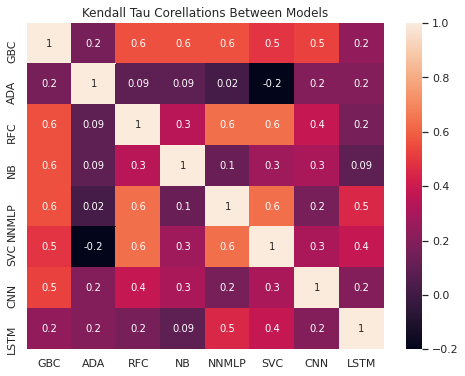

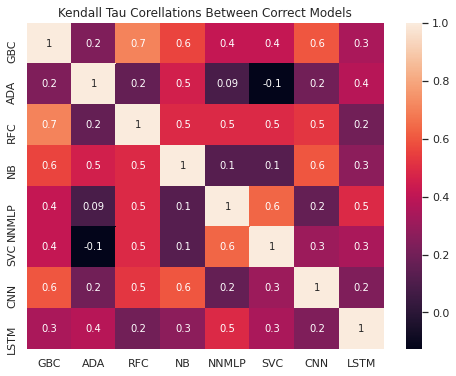

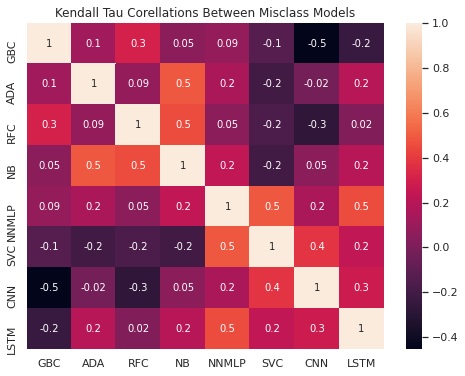

In [16]:
corr = models.corr(method='kendall')
rcParams['figure.figsize'] = 8,6
sns.heatmap(corr,annot=True,fmt='0.1g')
plt.title('Kendall Tau Corellations Between Models')
plt.show()

corr_corr = models_corr.corr(method='kendall')
rcParams['figure.figsize'] = 8,6
sns.heatmap(corr_corr,annot=True,fmt='0.1g')
plt.title('Kendall Tau Corellations Between Correct Models')
plt.show()

corr_mis = models_mis.corr(method='kendall')
rcParams['figure.figsize'] = 8,6
sns.heatmap(corr_mis,annot=True,fmt='0.1g')
plt.title('Kendall Tau Corellations Between Misclass Models')
plt.show()